# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

C:\Users\youss\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (url+city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tornio
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | margate
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | buala
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | mali
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | nikita
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | le port
Pro

Processing Record 38 of Set 4 | nador
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | paamiut
Processing Record 41 of Set 4 | muscat
Processing Record 42 of Set 4 | jaciara
Processing Record 43 of Set 4 | lufilufi
Processing Record 44 of Set 4 | ranghulu
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | hirara
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | santo domingo
Processing Record 49 of Set 4 | zhenlai
Processing Record 0 of Set 5 | henties bay
Processing Record 1 of Set 5 | iquique
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | moron
Processing Record 4 of Set 5 | hvolsvollur
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | drovyanaya
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | clyde river
Processing Record 9 of Set 5 | torbay
Processing Record 10 of Set 5 | hilo
Processing Record 11 of Set 5 | hamilton
Pro

Processing Record 31 of Set 8 | khasan
Processing Record 32 of Set 8 | faanui
Processing Record 33 of Set 8 | port macquarie
Processing Record 34 of Set 8 | boa esperanca
Processing Record 35 of Set 8 | oytal
Processing Record 36 of Set 8 | orlik
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | los llanos de aridane
Processing Record 39 of Set 8 | nauta
Processing Record 40 of Set 8 | kumluca
Processing Record 41 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 42 of Set 8 | camacha
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | inongo
Processing Record 45 of Set 8 | katsuura
Processing Record 46 of Set 8 | mitsamiouli
Processing Record 47 of Set 8 | penzance
Processing Record 48 of Set 8 | umtata
Processing Record 49 of Set 8 | kenai
Processing Record 0 of Set 9 | honiara
Processing Record 1 of Set 9 | broome
Processing Record 2 of Set 9 | plettenberg bay
Processing Record 3 of Set 9 | napoleon
Processing Record 4

Processing Record 17 of Set 12 | taltal
Processing Record 18 of Set 12 | maldonado
Processing Record 19 of Set 12 | biltine
Processing Record 20 of Set 12 | tecoanapa
Processing Record 21 of Set 12 | moree
Processing Record 22 of Set 12 | altay
Processing Record 23 of Set 12 | altamira
Processing Record 24 of Set 12 | qui nhon
Processing Record 25 of Set 12 | torbat-e jam
Processing Record 26 of Set 12 | bako
Processing Record 27 of Set 12 | kieta
Processing Record 28 of Set 12 | livingston
Processing Record 29 of Set 12 | kirakira
Processing Record 30 of Set 12 | honningsvag
Processing Record 31 of Set 12 | la paz
Processing Record 32 of Set 12 | kysyl-syr
Processing Record 33 of Set 12 | emporia
Processing Record 34 of Set 12 | shanghai
Processing Record 35 of Set 12 | niono
Processing Record 36 of Set 12 | apiai
Processing Record 37 of Set 12 | cravo norte
Processing Record 38 of Set 12 | vilhena
Processing Record 39 of Set 12 | kambove
Processing Record 40 of Set 12 | azangaro
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
#Display DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tornio,65.8481,24.1466,1.01,86,98,5.20,FI,1670294673
1,butaritari,3.0707,172.7902,27.16,80,86,6.66,KI,1670294673
2,nikolskoye,59.7035,30.7861,-7.06,88,100,3.86,RU,1670294674
3,margate,51.3813,1.3862,8.16,84,97,2.68,GB,1670294674
4,castro,-24.7911,-50.0119,18.43,95,91,1.33,BR,1670294675


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tornio,65.8481,24.1466,1.01,86,98,5.20,FI,1670294673
1,butaritari,3.0707,172.7902,27.16,80,86,6.66,KI,1670294673
2,nikolskoye,59.7035,30.7861,-7.06,88,100,3.86,RU,1670294674
3,margate,51.3813,1.3862,8.16,84,97,2.68,GB,1670294674
4,castro,-24.7911,-50.0119,18.43,95,91,1.33,BR,1670294675


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

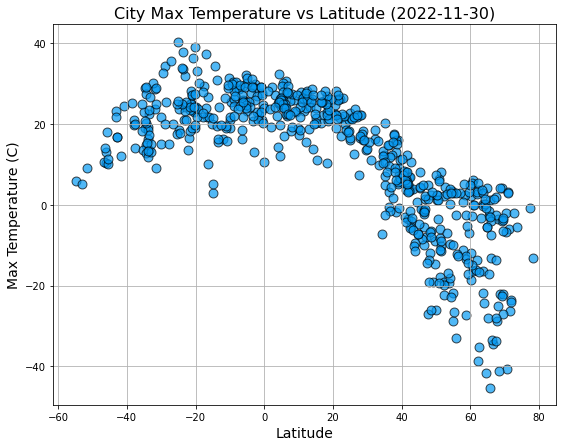

In [8]:
# Build scatter plot for latitude vs. temperature

x_axis_data=city_data_df['Lat']
y_axis_data=city_data_df['Max Temp']
plt.figure(figsize=(9,7))
plt.scatter(x_axis_data,y_axis_data, facecolors= "#069af3", edgecolors="black", s=80, alpha=0.7 )



# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.title("City Max Temperature vs Latitude (2022-11-30)", fontsize=16)
plt.grid()
       
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

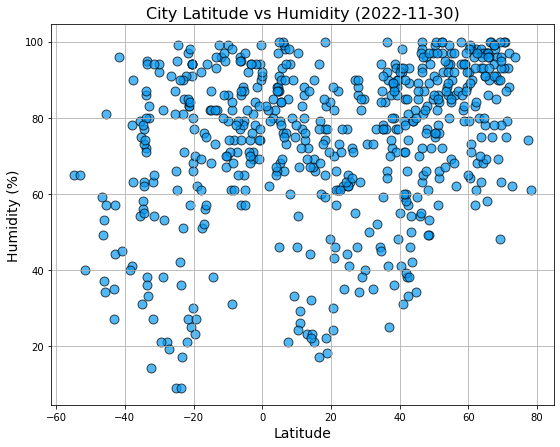

In [9]:
# Build the scatter plots for latitude vs. humidity

x_axis_data=city_data_df['Lat']
y_axis_data=city_data_df['Humidity']
plt.figure(figsize=(9,7))
plt.scatter(x_axis_data,y_axis_data, facecolors= "#069af3", edgecolors="black", s=80, alpha=0.7 )

# Incorporate the other graph properties

plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("City Latitude vs Humidity (2022-11-30)", fontsize=16)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

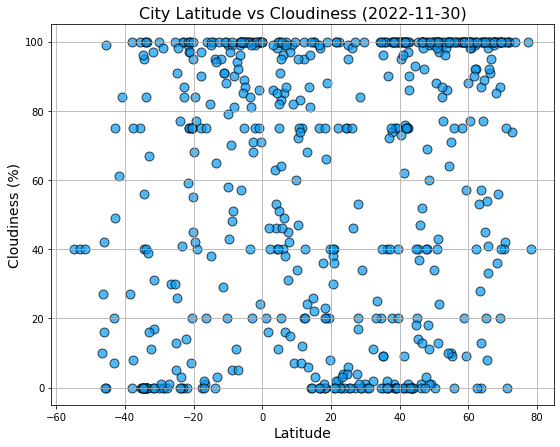

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis_data=city_data_df['Lat']
y_axis_data=city_data_df['Cloudiness']
plt.figure(figsize=(9,7))
plt.scatter(x_axis_data,y_axis_data, facecolors= "#069af3", edgecolors="black", s=80, alpha=0.7 )

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("City Latitude vs Cloudiness (2022-11-30)", fontsize=16)
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

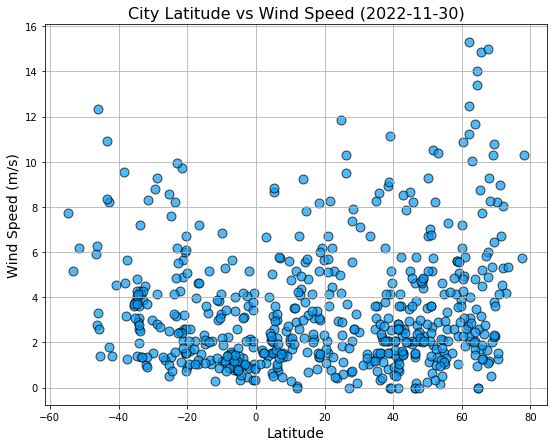

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis_data=city_data_df['Lat']
y_axis_data=city_data_df['Wind Speed']
plt.figure(figsize=(9,7))
plt.scatter(x_axis_data,y_axis_data, facecolors= "#069af3", edgecolors="black", s=80, alpha=0.7 )

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.title("City Latitude vs Wind Speed (2022-11-30)", fontsize=16)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [202]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#Dropping Southern Hemisphere cities
northern_hemi_df=city_data_df.drop(city_data_df[(city_data_df["Lat"]<0)].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tornio,65.8481,24.1466,1.01,86,98,5.20,FI,1670294673
1,butaritari,3.0707,172.7902,27.16,80,86,6.66,KI,1670294673
2,nikolskoye,59.7035,30.7861,-7.06,88,100,3.86,RU,1670294674
3,margate,51.3813,1.3862,8.16,84,97,2.68,GB,1670294674
6,qaanaaq,77.4840,-69.3632,-0.82,74,100,5.74,GL,1670294620


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
#Dropping Northern hemisphere cities
southern_hemi_df=city_data_df.drop(city_data_df[(city_data_df["Lat"]>=0)].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,castro,-24.7911,-50.0119,18.43,95,91,1.33,BR,1670294675
5,mataura,-46.1927,168.8643,10.27,37,16,2.75,NZ,1670294675
8,bluff,-46.6000,168.3333,10.45,59,10,5.90,NZ,1670294676
10,buala,-8.1450,159.5921,28.86,74,90,2.24,SB,1670294676
11,rikitea,-23.1203,-134.9692,24.02,81,100,6.17,PF,1670294676


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8311754848370766
The r-squared value is 0.6908526865941493


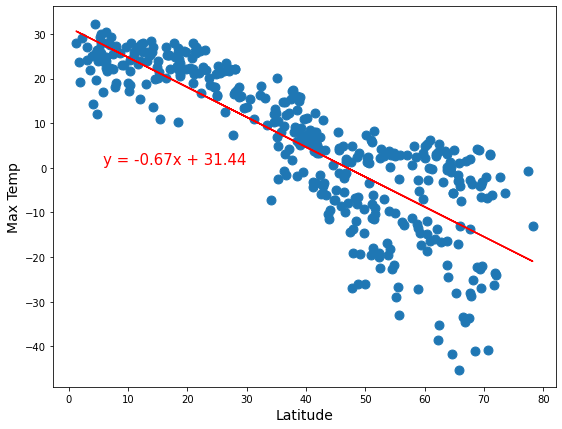

In [26]:
# Linear regression on Northern Hemisphere
x_axis_data=northern_hemi_df["Lat"]
y_axis_data=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept

plt.figure(figsize=(9,7))

plt.plot(x_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x_axis_data,y_axis_data,s=80)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Max Temp",fontsize=14)

plt.show()


The r-value is 0.39829370511329776
The r-squared value is 0.15863787553287859


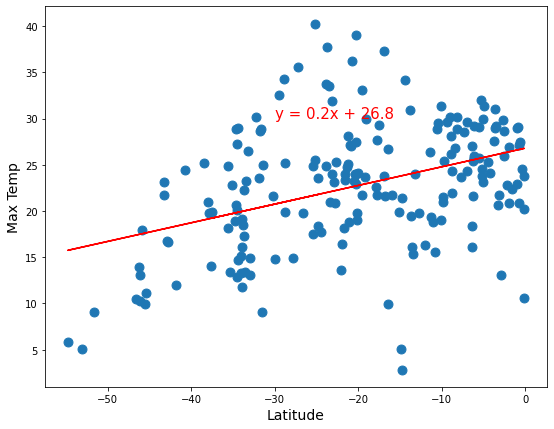

In [27]:
# Linear regression on Southern Hemisphere

x1_axis_data=southern_hemi_df["Lat"]
y1_axis_data=southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_axis_data, y1_axis_data)
regress_values = x1_axis_data * slope + intercept

plt.figure(figsize=(9,7))

plt.plot(x1_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x1_axis_data,y1_axis_data,s=80)
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Max Temp",fontsize=14)

plt.show()


**Discussion about the linear relationship:**The linear relationship is strong for the Northern Hemisphere, which shows that the closer you are to the Equator, the warmer temperatures get and vice-versa. However, that same linear relationship is not as strong for the Southern Hemisphere. Although it gets cooler the further you move away from the Equator, the association is relatively weak.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3114357046308175
The r-squared value is 0.0969921981188938


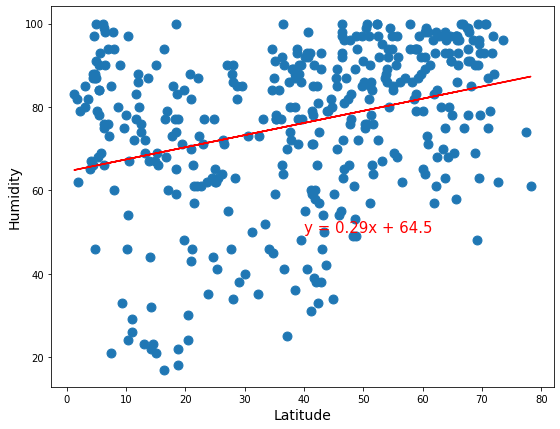

In [30]:
# Northern Hemisphere
x_axis_data=northern_hemi_df["Lat"]
y_axis_data=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
plt.figure(figsize=(9,7))

plt.plot(x_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x_axis_data,y_axis_data,s=80)
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity",fontsize=14)

plt.show()

The r-value is 0.3776056706262384
The r-squared value is 0.14258604248909124


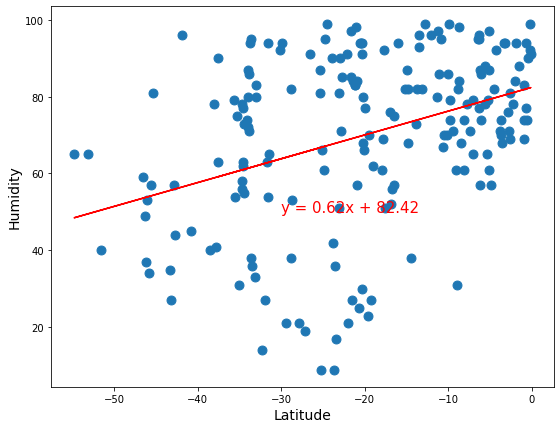

In [31]:
# Southern Hemisphere
x1_axis_data=southern_hemi_df["Lat"]
y1_axis_data=southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_axis_data, y1_axis_data)
regress_values = x1_axis_data * slope + intercept

plt.figure(figsize=(9,7))

plt.plot(x1_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x1_axis_data,y1_axis_data,s=80)
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Humidity",fontsize=14)

plt.show()


**Discussion about the linear relationship:** There a weak correlation between Humidity and Latitude as indicated by the small r-value for both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2500799631702521
The r-squared value is 0.06253998797923466


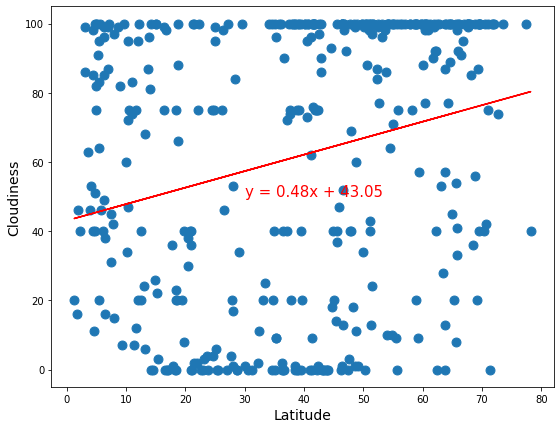

In [32]:
# Northern Hemisphere
x_axis_data=northern_hemi_df["Lat"]
y_axis_data=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
plt.figure(figsize=(9,7))

plt.plot(x_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x_axis_data,y_axis_data,s=80)
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness",fontsize=14)

plt.show()

The r-value is 0.4474677997354311
The r-squared value is 0.20022743180006788


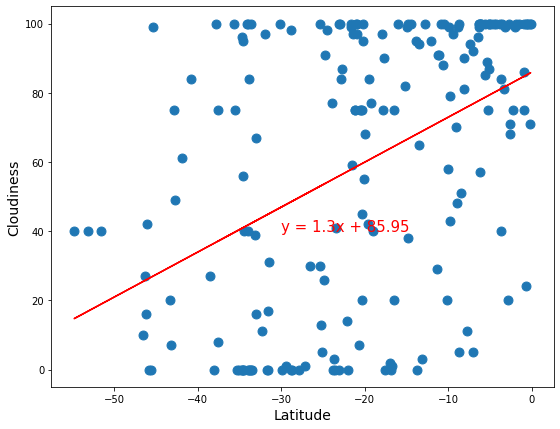

In [33]:
# Southern Hemisphere
x1_axis_data=southern_hemi_df["Lat"]
y1_axis_data=southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_axis_data, y1_axis_data)
regress_values = x1_axis_data * slope + intercept

plt.figure(figsize=(9,7))

plt.plot(x1_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x1_axis_data,y1_axis_data,s=80)
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Cloudiness",fontsize=14)

plt.show()

**Discussion about the linear relationship:** There is a weak correlation between Cloudiness and Latitude as indicated by the small r-value for both hemispheres. However, the linear relationship is stronger in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.21004115361895476
The r-squared value is 0.04411728621358135


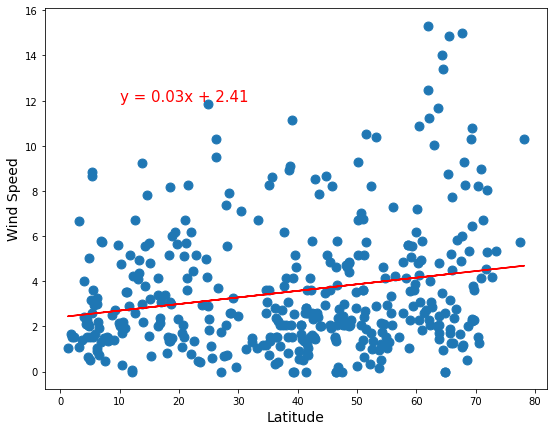

In [34]:
# Northern Hemisphere
x_axis_data=northern_hemi_df["Lat"]
y_axis_data=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
plt.figure(figsize=(9,7))

plt.plot(x_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x_axis_data,y_axis_data,s=80)
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Wind Speed",fontsize=14)

plt.show()

The r-value is -0.42728482275461704
The r-squared value is 0.1825723197564445


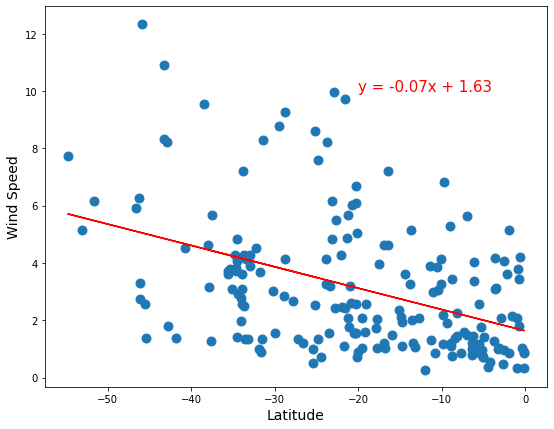

In [35]:
# Southern Hemisphere
x1_axis_data=southern_hemi_df["Lat"]
y1_axis_data=southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_axis_data, y1_axis_data)
regress_values = x1_axis_data * slope + intercept

plt.figure(figsize=(9,7))

plt.plot(x1_axis_data,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is {rvalue}\nThe r-squared value is {rvalue*rvalue}')
plt.scatter(x1_axis_data,y1_axis_data,s=80)
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel("Latitude",fontsize=14)
plt.ylabel("Wind Speed",fontsize=14)

plt.show()

**Discussion about the linear relationship:** There is a weak linear relationship between Wind Speed and Latitude as indicated by the small r-value for both hemispheres. 